In [2]:
import Pkg; Pkg.add("ToeplitzMatrices")
import Pkg; Pkg.add("LaTeXStrings")
import Pkg; Pkg.add("IterativeSolvers")

   Resolving package versions...
    Updating `/opt/julia/environments/v1.10/Project.toml`
  [c751599d] + ToeplitzMatrices v0.8.3
    Updating `/opt/julia/environments/v1.10/Manifest.toml`
  [621f4979] + AbstractFFTs v1.5.0
  [187b0558] + ConstructionBase v1.5.5
  [717857b8] + DSP v0.7.9
  [7a1cc6ca] + FFTW v1.8.0
  [1a297f60] + FillArrays v1.11.0
  [c8e1da08] + IterTools v1.10.0
  [f27b6e38] + Polynomials v4.0.11
  [efcf1570] + Setfield v1.1.1
  [276daf66] + SpecialFunctions v2.4.0
  [1e83bf80] + StaticArraysCore v1.4.3
  [c751599d] + ToeplitzMatrices v0.8.3
  [f5851436] + FFTW_jll v3.3.10+0
  [1d5cc7b8] + IntelOpenMP_jll v2024.1.0+0
  [856f044c] + MKL_jll v2024.1.0+0
  [efe28fd5] + OpenSpecFun_jll v0.5.5+0
  [1317d2d5] + oneTBB_jll v2021.12.0+0
  [9fa8497b] + Future
   Resolving package versions...
    Updating `/opt/julia/environments/v1.10/Project.toml`
  [b964fa9f] + LaTeXStrings v1.3.1
  No Changes to `/opt/julia/environments/v1.10/Manifest.toml`
   Resolving package versions...


In [3]:
using LinearAlgebra
using Plots
using ToeplitzMatrices
using LaTeXStrings
using IterativeSolvers

Pkg.DEFAULT_IO[]


m=10
n=100

s= 1
d=0
e=1


x = range(-pi, pi, length=1000)

phi = 0
psi= 1/(2*sqrt(pi*s))



#phi definieren phi = e * exp
for i in -m:m
    phi = @. phi + exp(-s*(x + 2pi*i)^2)
end
phi = @. e * phi + d



#Fourier-Koeffizienten
a_phi = [e * 1/(2*sqrt(pi*s)) + d]
a_psi = [e * 1/(2*sqrt(pi*s)) + d]

for j in 1:n-1

    #psi definieren
    psi = @. psi + 2(n-j)/n * 1/(2*sqrt(pi*s)) *exp(-(j^2)/(4*s)) *(cos(j*x) + cos((n-j)*x))

    #Fourier-Koeffizienten
    push!(a_phi ,e * 1/(2*sqrt(pi*s)) *exp(-(j^2)/(4*s)))
    push!(a_psi ,e * ((n-j)/n * 1/(2*sqrt(pi*s)) *exp(-(j^2)/(4*s)) +   (j/n) *  1/(2*sqrt(pi*s)) *exp(-((n-j)^2)/(4*s))))

end
psi = @. e * psi + d



a_phi
a_psi

T_phi = SymmetricToeplitz(a_phi)
#T_psi ist die zyklische Matrix, die die Frobenius-Norm minimiert
T_psi = SymmetricToeplitz(a_psi)
T_psi_invers = trench(T_psi)

A =  T_psi_invers * T_phi


display(A)

cond(T_phi, 2)

100×100 Matrix{Float64}:
  16.9404       8.83732      2.56576     …  -9.6117       -16.9424
 -11.4003      -5.27904     -1.65838         7.54482       12.6077
   6.5421       3.59791      1.80563        -4.64937       -7.45342
  -3.00189     -1.64051     -0.267283        2.3004         3.53324
   0.998738     0.541823     0.0334239      -0.865924      -1.24332
  -0.107501    -0.0555534    0.0438108   …   0.174269       0.188368
  -0.16877     -0.0939604   -0.0491574       0.0729063      0.160729
   0.181288     0.0997572    0.0328826      -0.11245       -0.19562
  -0.118775    -0.0650599   -0.0166092       0.0821898      0.133897
   0.058858     0.0321159    0.00621613     -0.0442189     -0.0687015
  -0.0213909   -0.0116044   -0.00116818  …   0.0179645      0.0262435
   0.00355444   0.00187816  -0.00061286     -0.00438682    -0.00530458
   0.00253268   0.00141939   0.00086963     -0.000856469   -0.00225177
   ⋮                                     ⋱                
  -0.00530458  -0.004

9473.355187247627

In [4]:
eig_A = eigvals(A)

100-element Vector{Float64}:
  0.05957485603158633
  0.06272551583319345
  0.06798528553246679
  0.07548080597500334
  0.0851165582149664
  0.09725153843851794
  0.11145405969777311
  0.12858056116132396
  0.1474011085523777
  0.16980155167766814
  0.19294317492556015
  0.22069075911634303
  0.24732171246772208
  ⋮
  1.0096442561344396
  1.0098650527049537
  1.010108554924646
  1.010285178518843
  1.010465464284653
  1.0105970559180262
  1.0107181839458177
  1.0108034667320833
  1.0108689409437475
  1.0109062247152054
  1.2683115832794702
 22.68855818793815

In [5]:
eig_T_phi = eigvals(T_phi)

100-element Vector{Float64}:
 0.00010545868381024595
 0.00011155410220083691
 0.00012190912344636163
 0.00013682139468452505
 0.00015671497819493883
 0.00018214778345741306
 0.0002138212237379076
 0.00025259216223118334
 0.00029948721798568227
 0.0003557195040470896
 0.00042270786991231235
 0.0005020987176803747
 0.0005957904561118637
 ⋮
 0.8717870541235905
 0.8911029789198038
 0.9091129952456756
 0.9257213952981912
 0.940838711542489
 0.9543825189792082
 0.9662781836773655
 0.9764595480611975
 0.9848695441428603
 0.9914607267419008
 0.9961957197142571
 0.999047569312766

In [6]:
eigvals(T_psi)

100-element Vector{Float64}:
 0.0017673624197248842
 0.0017781490448280203
 0.0017781490448282014
 0.00181144908380399
 0.0018114490838040647
 0.0018701520290642737
 0.001870152029064287
 0.0019593055282191387
 0.001959305528219218
 0.0020864693033740356
 0.002086469303374126
 0.002262222272570744
 0.0022622222725708404
 ⋮
 0.8596379268114834
 0.8973060012685137
 0.8973060012685141
 0.9293556584228115
 0.9293556584228125
 0.9550761794535019
 0.9550761794535024
 0.9738846195532951
 0.9738846195532954
 0.9853477946938214
 0.985347794693822
 0.9891988892468356

In [7]:
eigvals(T_psi_invers)

100-element Vector{Float64}:
   1.0109190486065083
   1.0148700848421701
   1.014870084842218
   1.0268156821890004
   1.0268156821890282
   1.047036897697724
   1.0470368976977293
   1.076014323404529
   1.0760143234045885
   1.11444702095641
   1.1144470209564192
   1.163280456586091
   1.1632804565861306
   ⋮
 442.0432121657038
 479.27855846375724
 479.27855846375763
 510.38492241120093
 510.38492241120105
 534.7158864407053
 534.715886440706
 552.0442219109966
 552.044221910997
 562.3825533121548
 562.3825533121551
 565.8149052165834

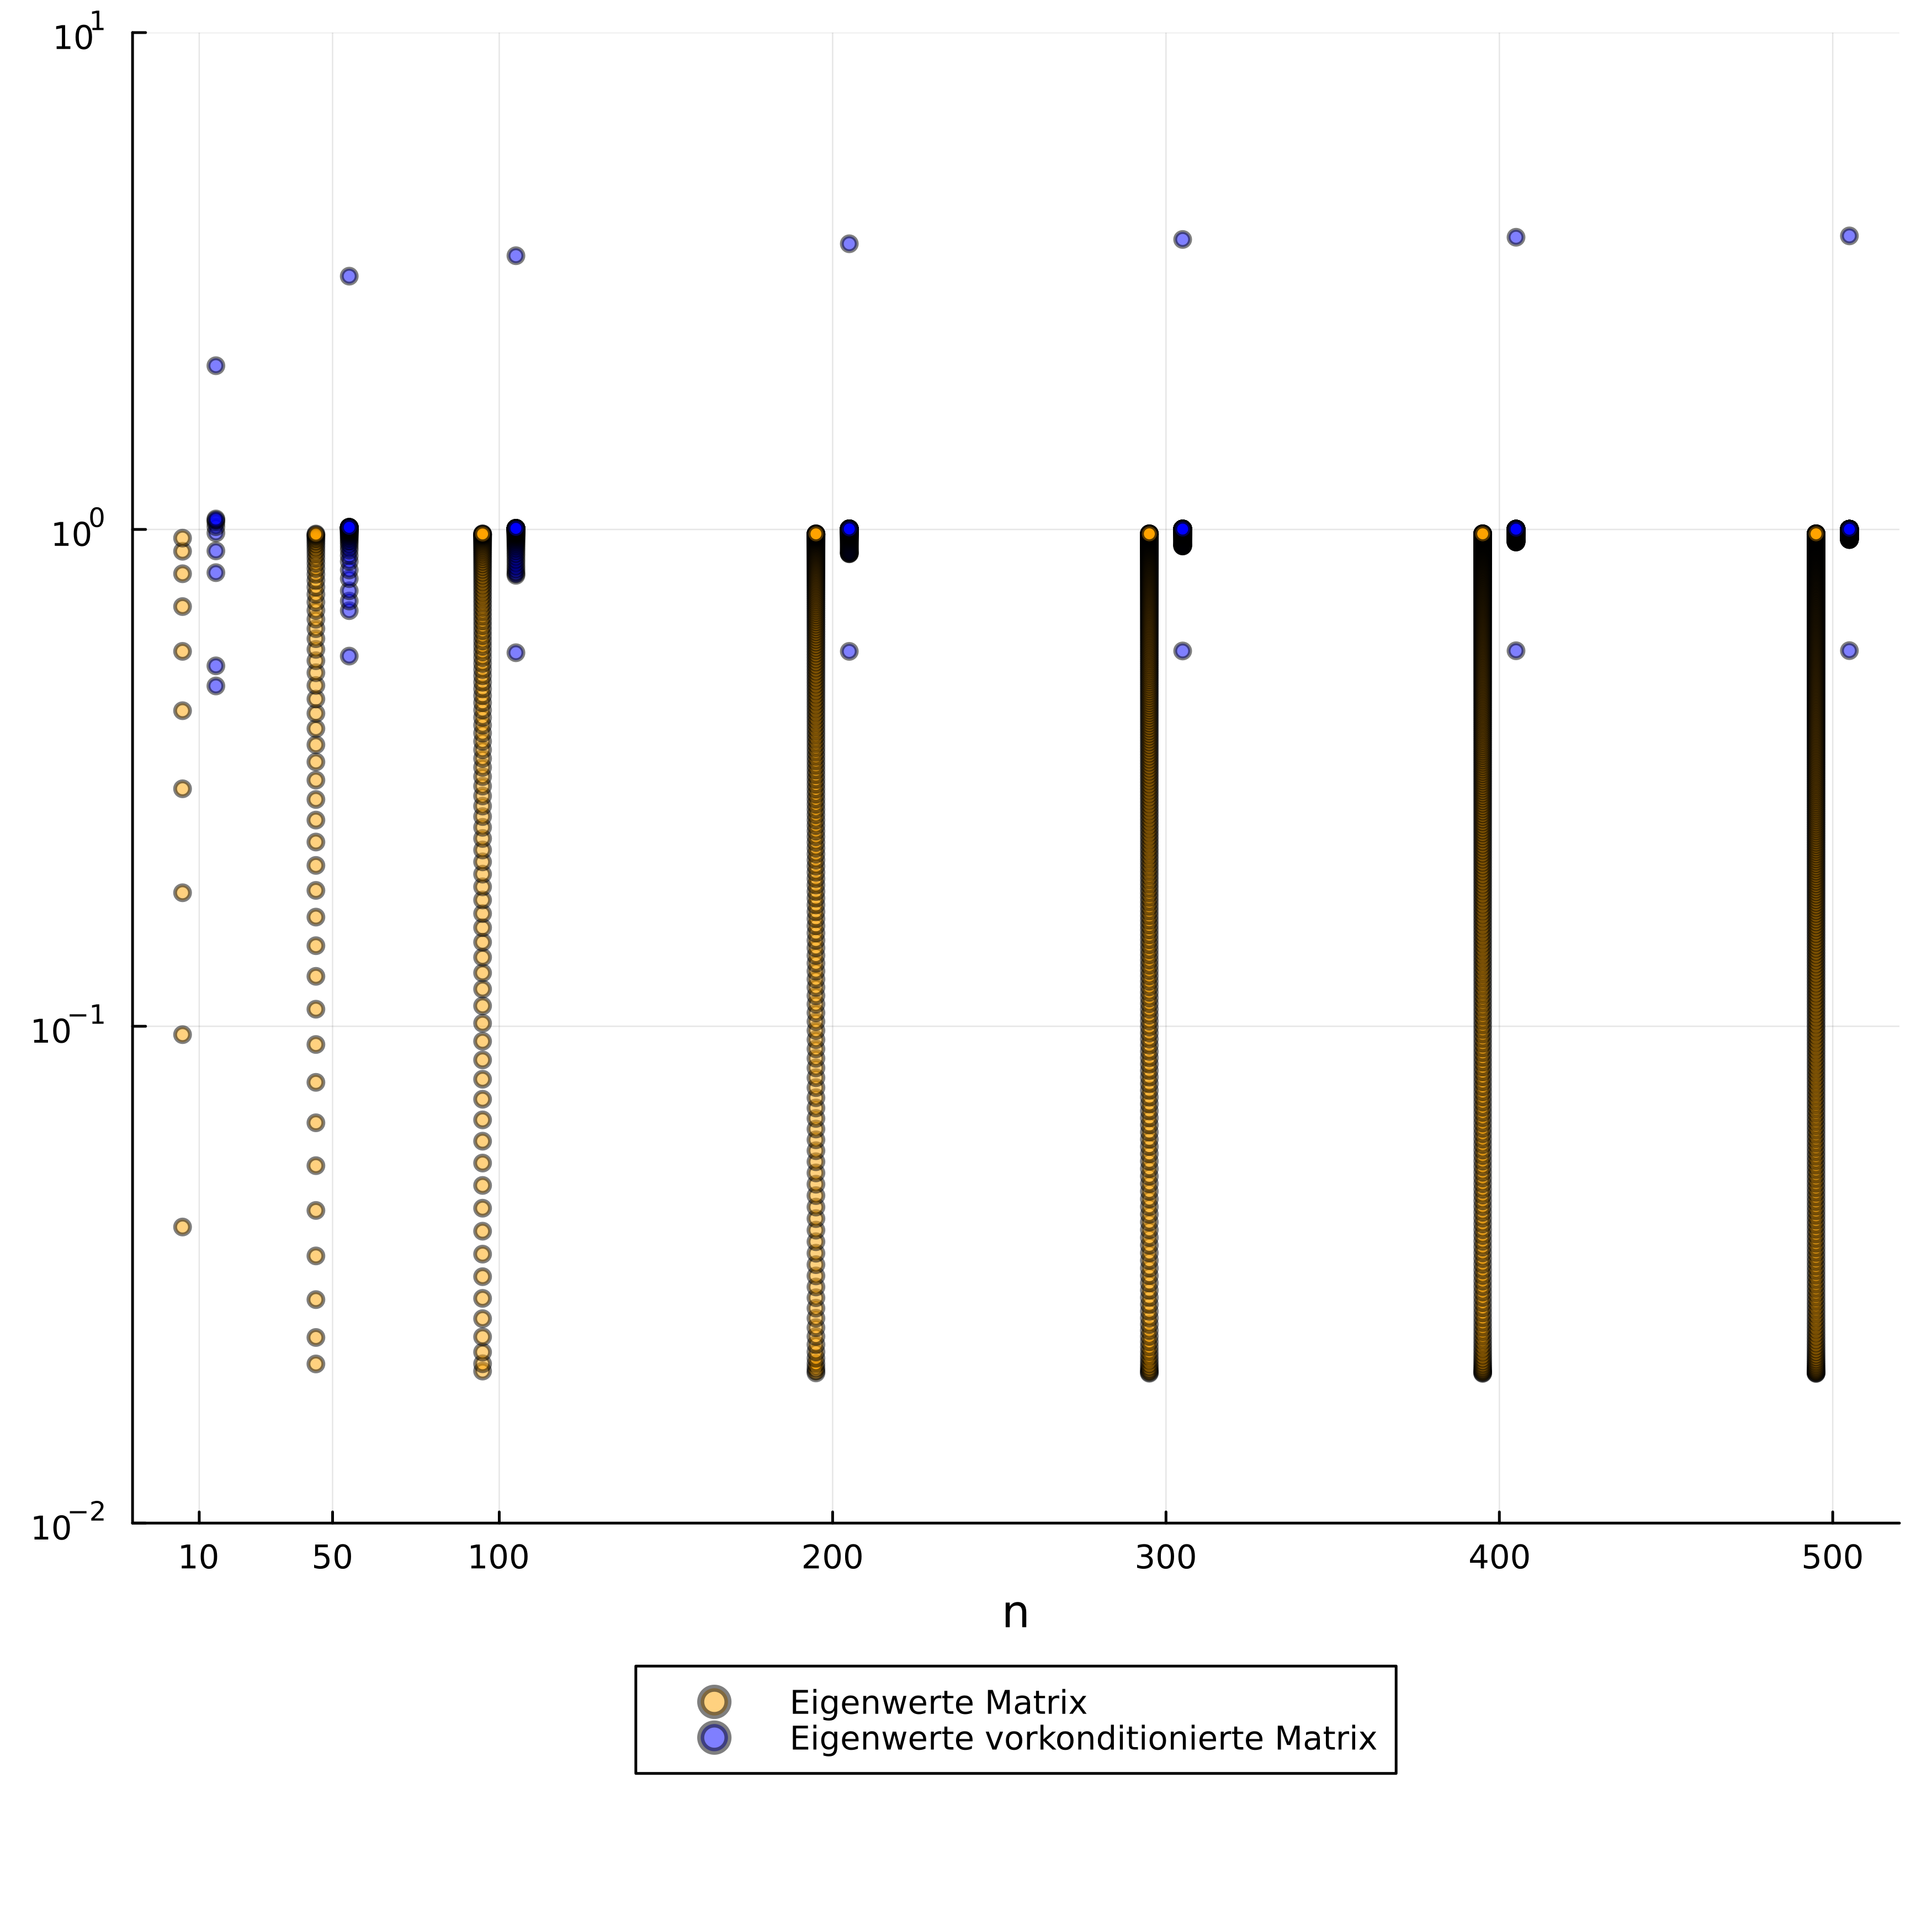

In [8]:
#Eigenwerte von tridiagonaler Toeplitz-Matrix und vorkonditionierter Toeplitz-Matrix für verschiedene n
#Einträge der Toeplitz-Matrix
a=1/2
b=-0.24


dimensions = [10, 50, 100, 200 ,300, 400 ,500]
bsp1abb1= scatter( yscale=:log10 , ms=1, ma=1,legend=:outerbottom, xlabel = "n",size = (700,700), xticks = dimensions, dpi=500)


for i in dimensions
    
    #tridiagonale Koeffizientenmatrix
    erz_vec = zeros(i)
    erz_vec[1,1] = a
    erz_vec[2,1] = b
    T_tridiag = SymmetricToeplitz(erz_vec)

    #Vorkonditionierer Frobenius Norm
    erz_vec2 = zeros(i)
    erz_vec2[1,1] = a
    erz_vec2[2,1] = ((i-1)*b)/i
    erz_vec2[i,1] = ((i-1)*b)/i
    T_circ = SymmetricToeplitz(erz_vec2)
    T_circ_inv = trench(T_circ)

    #Eigenwerte berechnen
    eigvals_tridiag_vorkond = eigvals(T_tridiag * T_circ_inv)
    eigvals_T_tridiag = eigvals(T_tridiag )

    
    #damit jeweils nur ein Label erscheint
    label1 = false
    label2 = false
    if i== dimensions[1,1]
        label1 = "Eigenwerte Matrix"
        label2 = "Eigenwerte vorkonditionierte Matrix"
    end       
    vec = i * ones(i,1)
    scatter!(bsp1abb1,vec.-5,eigvals_T_tridiag, ms=3, ma=0.5,seriescolor= :orange,label= label1)

    scatter!(bsp1abb1,vec.+5,eigvals_tridiag_vorkond, ms=3, ma=0.5,seriescolor= :blue,label= label2)
    
end

ylims!(1e-2,10)
yticks!([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10])
display(bsp1abb1)



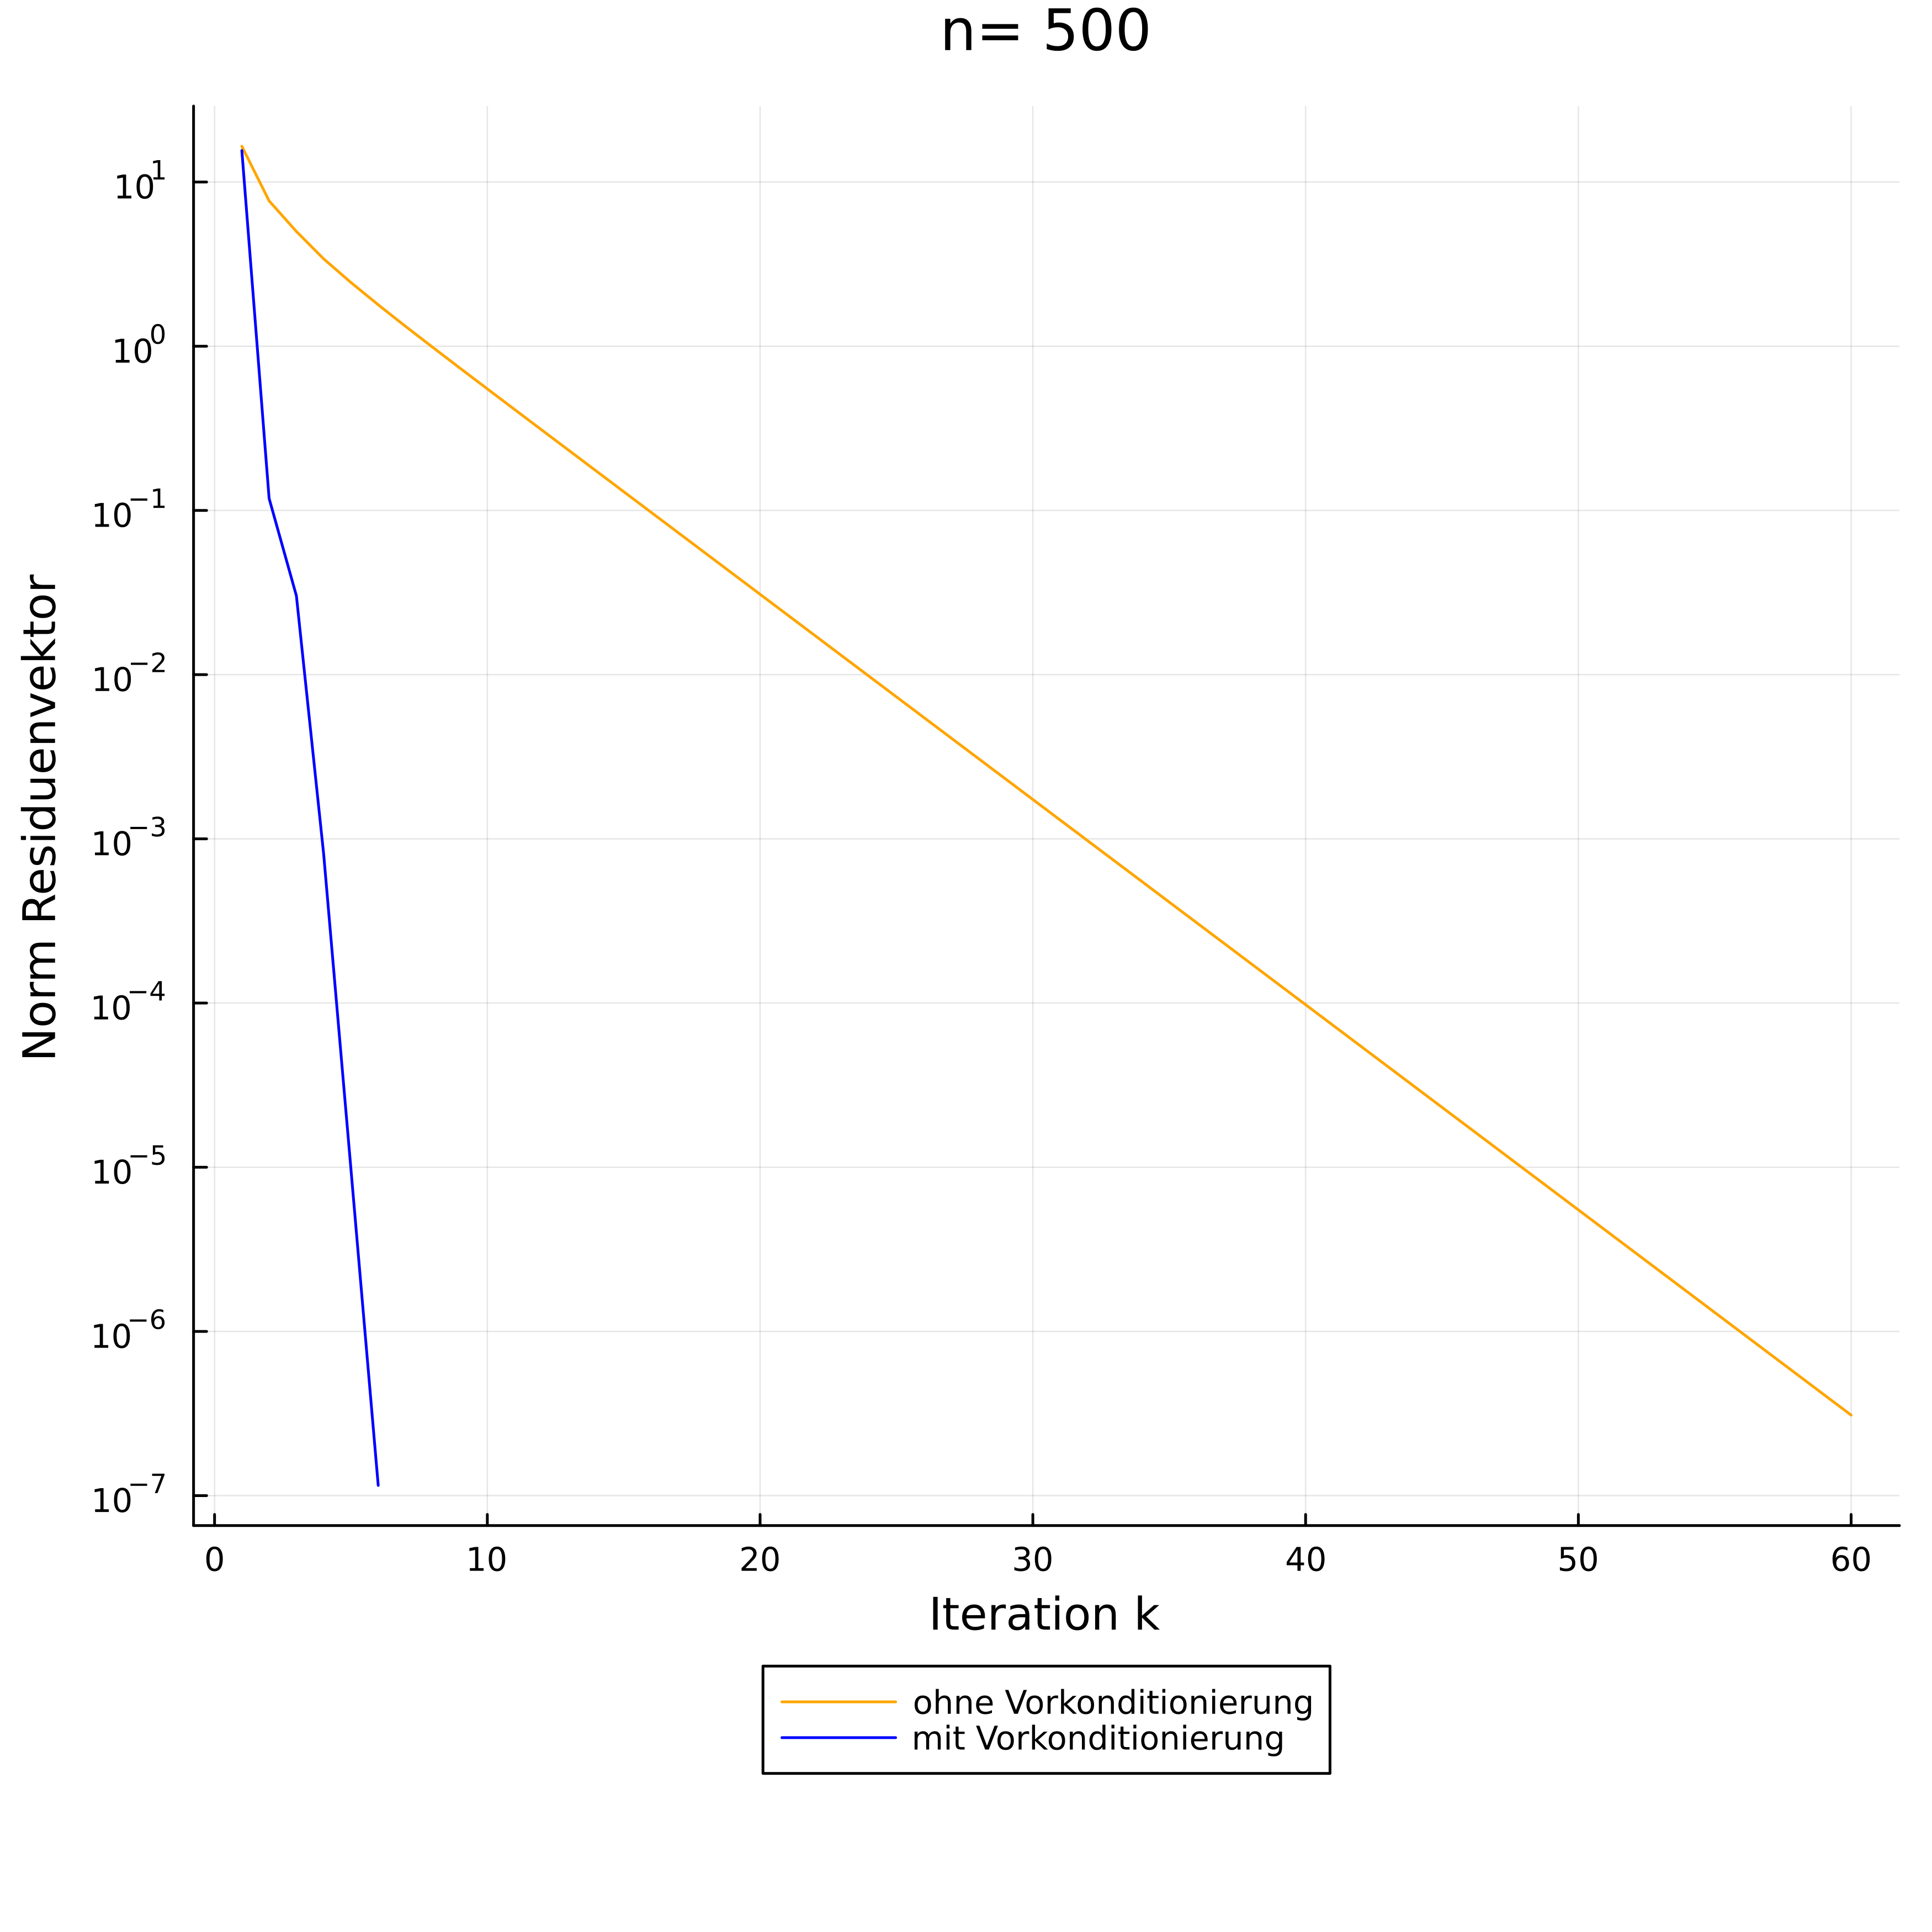

In [9]:
#Konvergenzhistorie berechnen (Norm der Residuenvektoren)

a=1/2
b=-0.24
n = 500

#rechte Seite des Gleichungssystems
d = ones(n)

#initiale Lösung
x = zeros(n)
x[1,1] = 1
y= zeros(n)
y[1,1] = 1


 #tridiagonale Koeffizientenmatrix
erz_vec = zeros(n)
erz_vec[1,1] = a
erz_vec[2,1] = b
T_tridiag = SymmetricToeplitz(erz_vec)

#Vorkonditionierer Frobenius Norm
erz_vec2 = zeros(n)
erz_vec2[1,1] = a
erz_vec2[2,1] = ((n-1)*b)/n
erz_vec2[n,1] = ((n-1)*b)/n
T_circ = SymmetricToeplitz(erz_vec2)


#CG-Verfahren ohne Vorkonditionierer
x, ch_1 =cg!(x, T_tridiag, d, log= true, abstol = 1e-7)
#mit Vorkonditionierung von links
y, ch_2 =cg!(y, T_tridiag, d, log= true, Pl = T_circ, abstol = 1e-7)


bsp1abb2= plot( yscale=:log10 , ms=1, ma=1,legend=:outerbottom, xlabel = "Iteration k",ylabel = "Norm Residuenvektor",title = "n= 500", size = (700,700),dpi=500)
yticks!([0,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100])
xticks!([0,10,20,30,40,50,60,70,100,200,300,400,500])

plot!(bsp1abb2, ch_1[:resnorm], ms=3, ma=0.5,seriescolor= :orange, label = "ohne Vorkonditionierung")
plot!(bsp1abb2,ch_2[:resnorm], ms=3, ma=0.5,seriescolor= :blue, label = "mit Vorkonditionierung")

display(bsp1abb2)


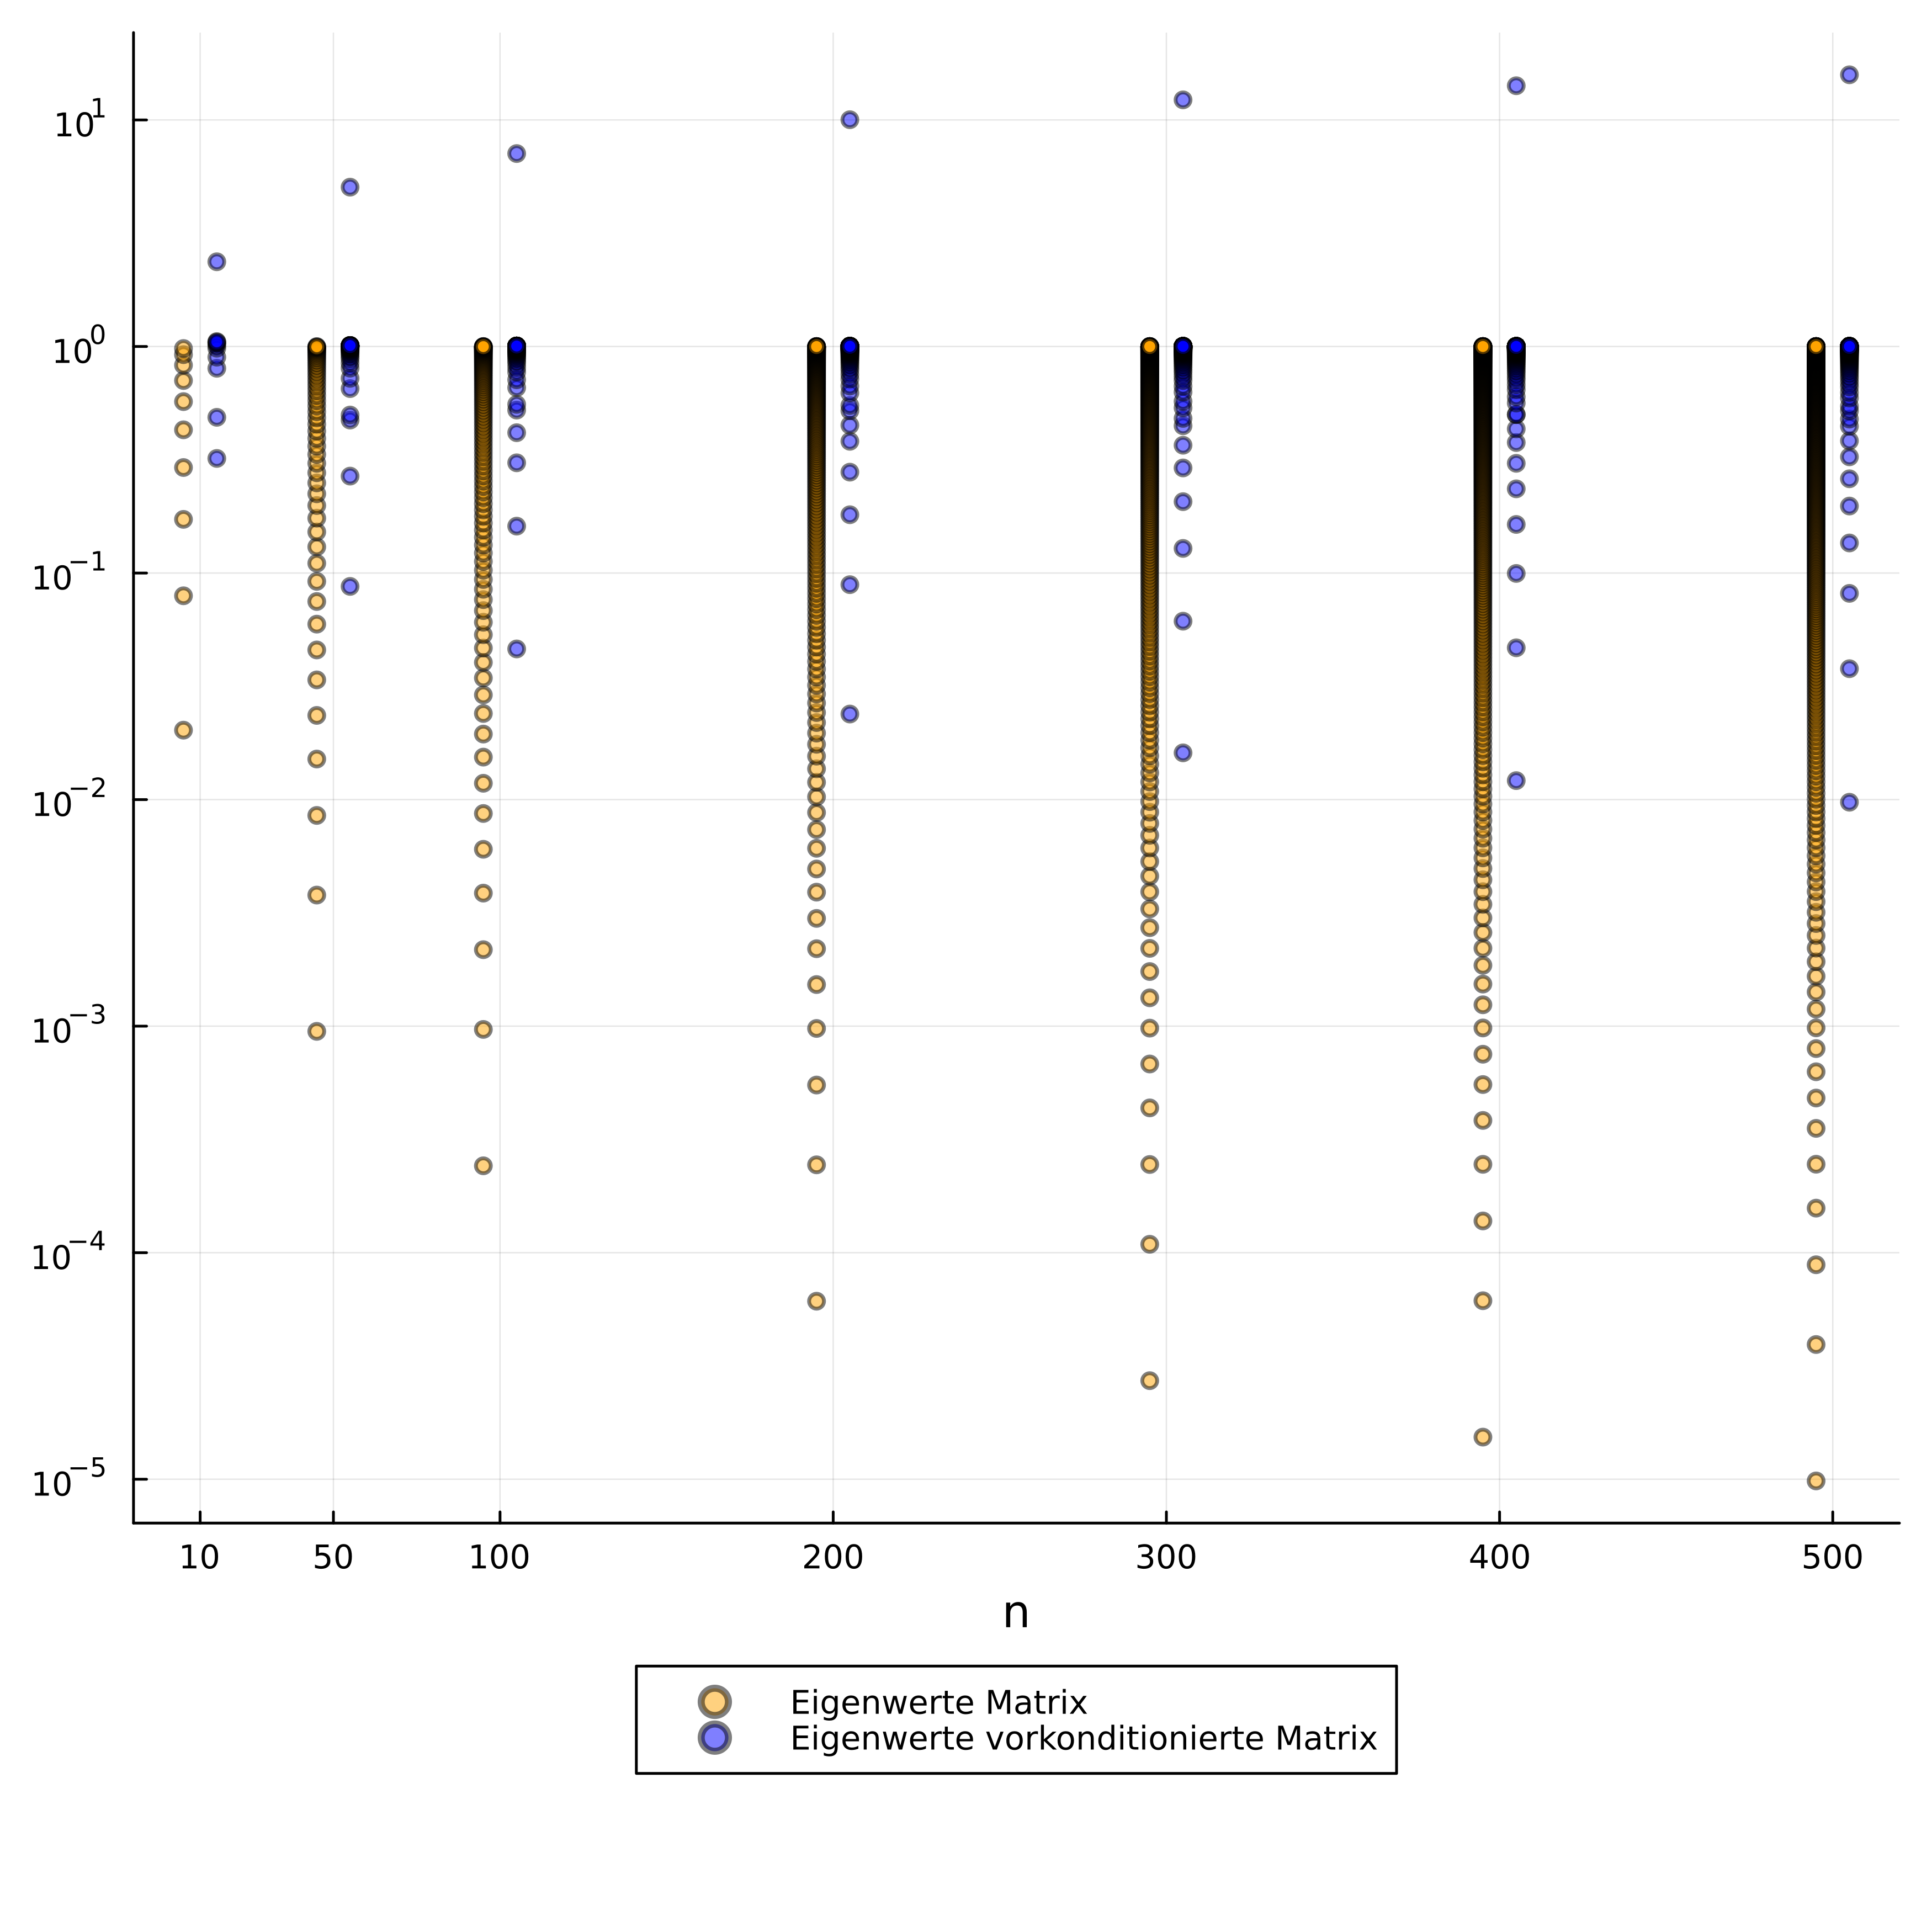

In [10]:
#Eigenwerte von tridiagonaler Toeplitz-Matrix und vorkonditionierter Toeplitz-Matrix für verschiedene n
#Einträge der Toeplitz-Matrix

a=1/2
b=-0.25


dimensions = [10, 50, 100, 200 ,300, 400 ,500]
bsp2abb1= scatter( yscale=:log10 , ms=1, ma=1,legend=:outerbottom, xlabel = "n",size = (700,700), xticks = dimensions,dpi=500)


for i in dimensions
    
    #tridiagonale Koeffizientenmatrix
    erz_vec = zeros(i)
    erz_vec[1,1] = a
    erz_vec[2,1] = b
    T_tridiag = SymmetricToeplitz(erz_vec)

    #Vorkonditionierer Frobenius Norm
    erz_vec2 = zeros(i)
    erz_vec2[1,1] = a
    erz_vec2[2,1] = ((i-1)*b)/i
    erz_vec2[i,1] = ((i-1)*b)/i
    T_circ = SymmetricToeplitz(erz_vec2)
    T_circ_inv = trench(T_circ)

    #Eigenwerte berechnen
    eigvals_tridiag_vorkond = eigvals(T_tridiag * T_circ_inv)
    eigvals_T_tridiag = eigvals(T_tridiag )

    
    #damit jeweils nur ein Label erscheint
    label1 = false
    label2 = false
    if i== dimensions[1,1]
        label1 = "Eigenwerte Matrix"
        label2 = "Eigenwerte vorkonditionierte Matrix"
    end       
    vec = i * ones(i,1)
    scatter!(bsp2abb1,vec.-5,eigvals_T_tridiag, ms=3, ma=0.5,seriescolor= :orange,label= label1)

    scatter!(bsp2abb1,vec.+5,eigvals_tridiag_vorkond, ms=3, ma=0.5,seriescolor= :blue,label= label2)
    
end

yticks!([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10])
display(bsp2abb1)


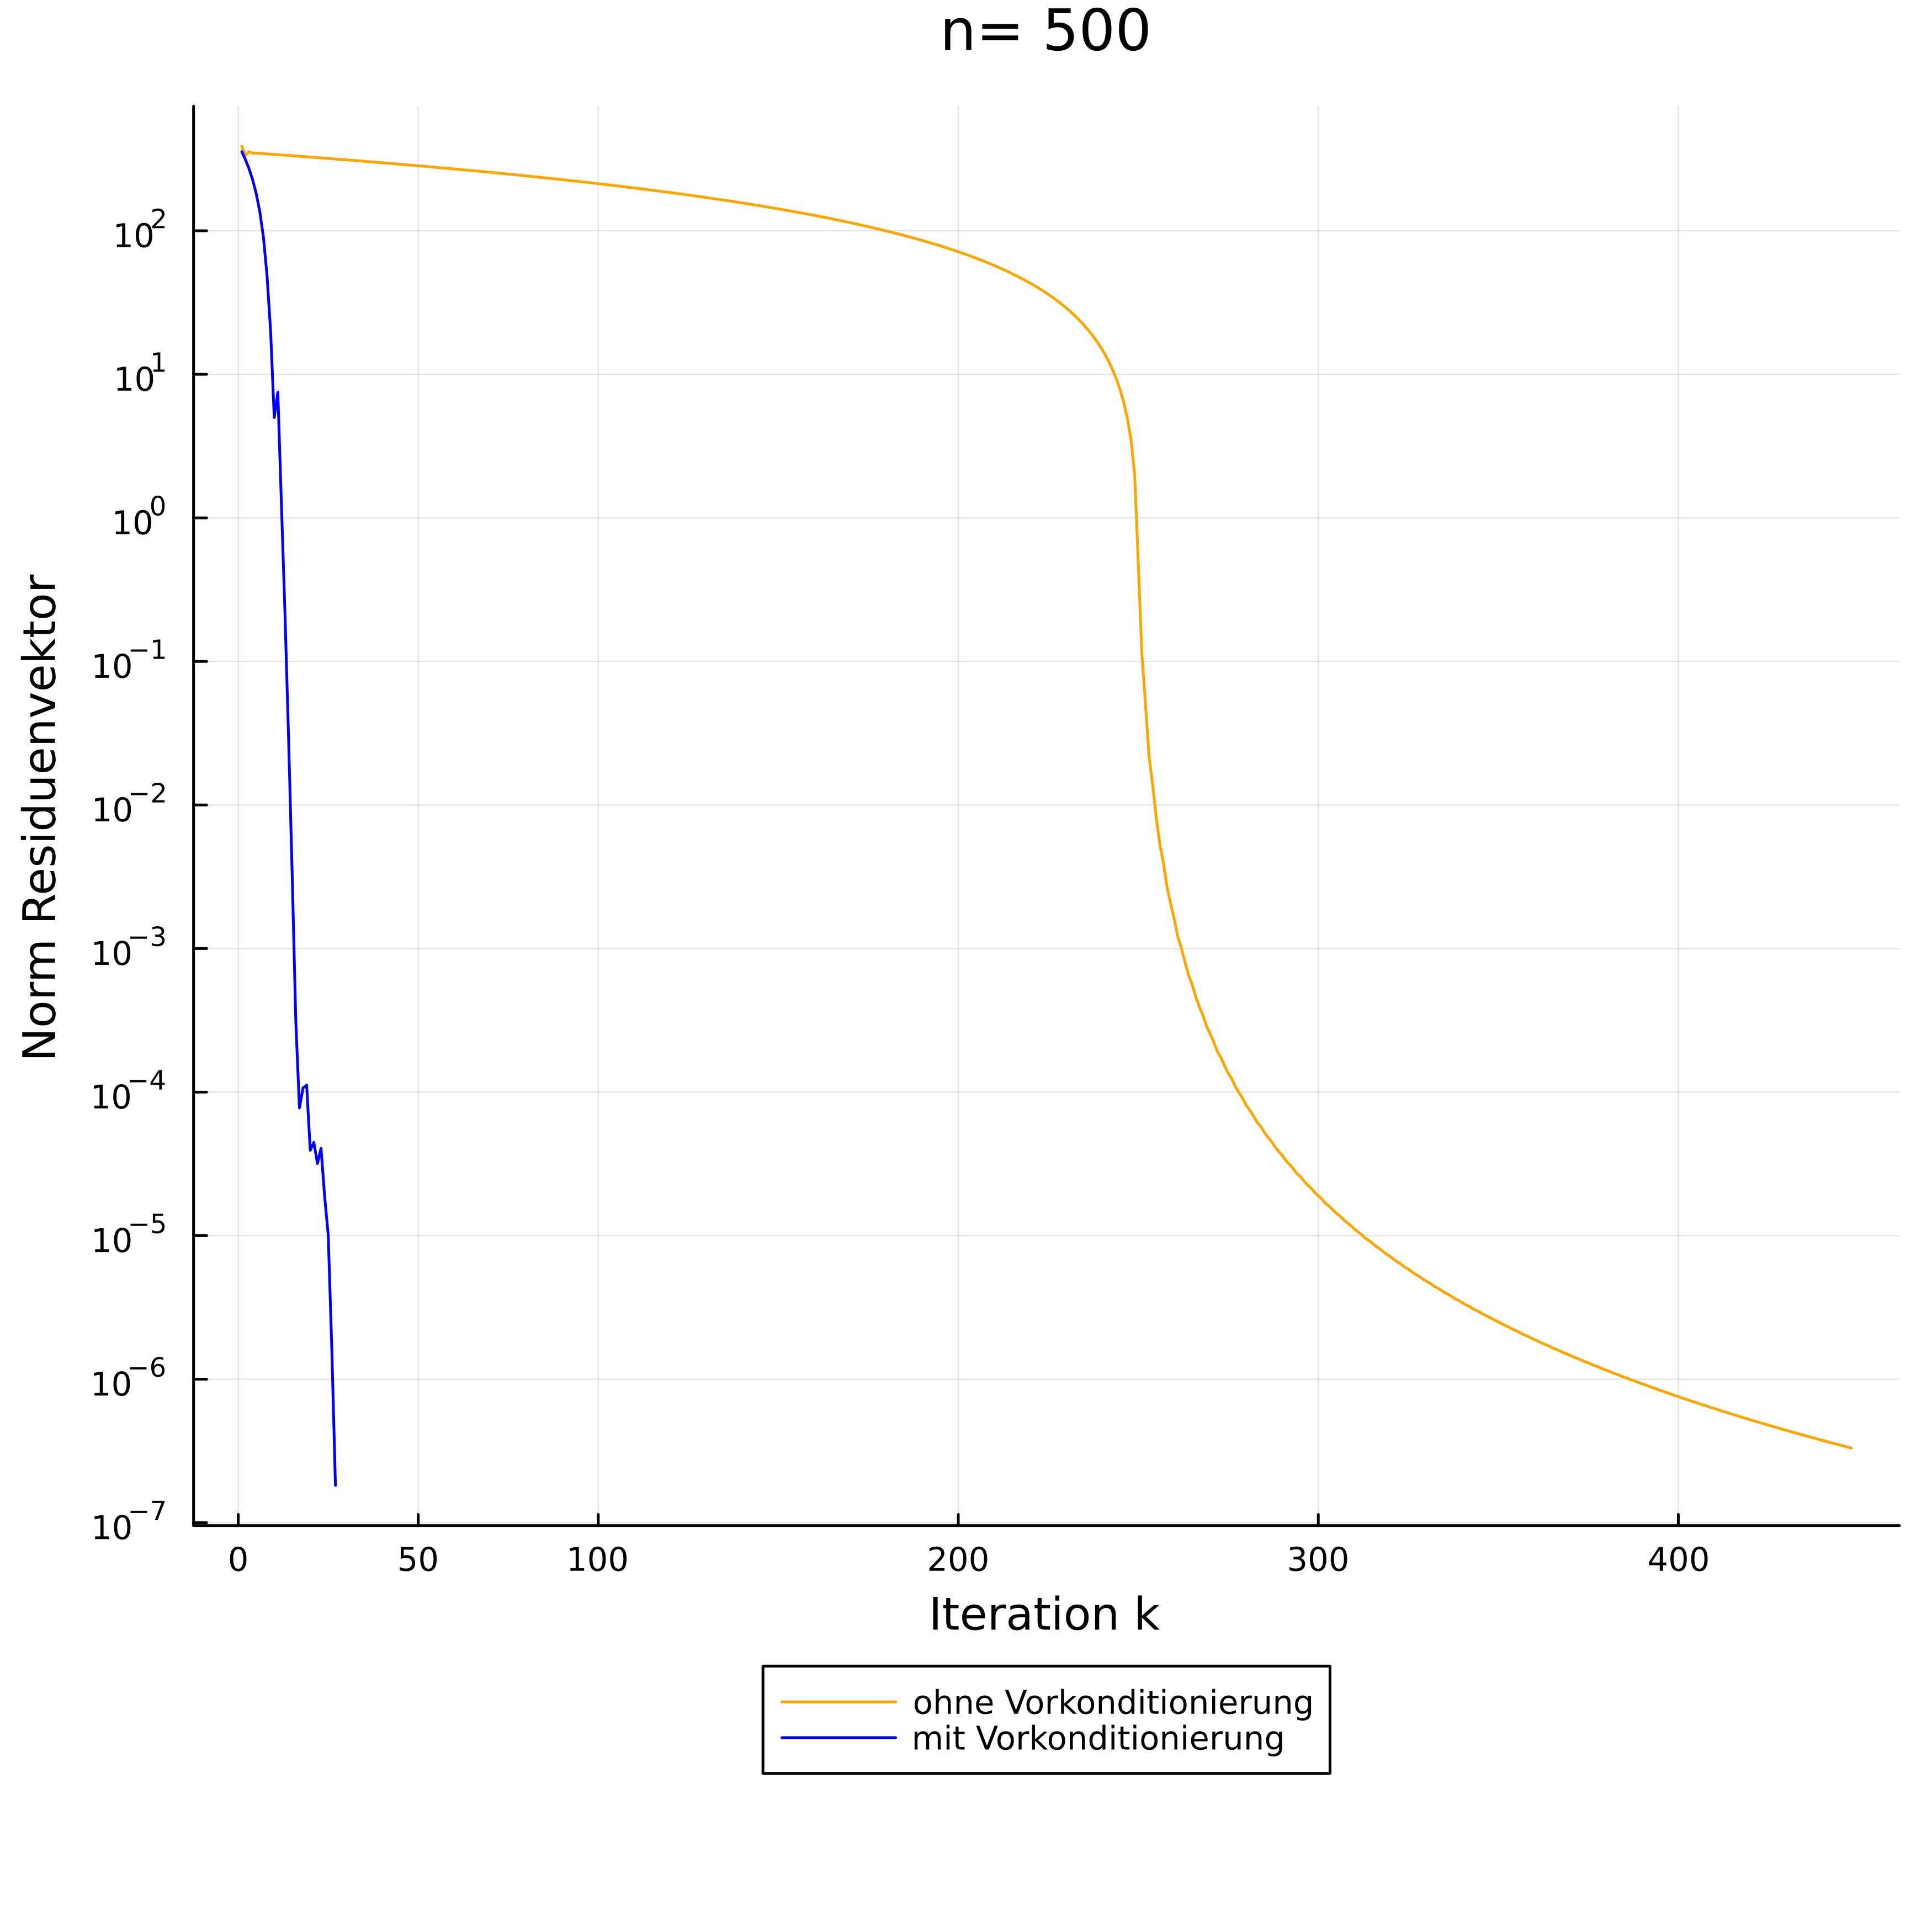

In [16]:
#Konvergenzhistorie berechnen (Norm der Residuenvektoren)

a=1/2
b=-0.25
n = 500

#rechte Seite des Gleichungssystems
d = ones(n)

#initiale Lösung
x = zeros(n)
x[1,1] = 1
y= zeros(n)
y[1,1] = 1


 #tridiagonale Koeffizientenmatrix
erz_vec = zeros(n)
erz_vec[1,1] = a
erz_vec[2,1] = b
T_tridiag = SymmetricToeplitz(erz_vec)

#Vorkonditionierer Frobenius Norm
erz_vec2 = zeros(n)
erz_vec2[1,1] = a
erz_vec2[2,1] = ((n-1)*b)/n
erz_vec2[n,1] = ((n-1)*b)/n
T_circ = SymmetricToeplitz(erz_vec2)


#CG-Verfahren ohne Vorkonditionierer
x, ch_1 =cg!(x, T_tridiag, d, log= true, abstol = 1e-7)
#mit Vorkonditionierung von links
y, ch_2 =cg!(y, T_tridiag, d, log= true, Pl = T_circ, abstol = 1e-7)


bsp2abb2= plot( yscale=:log10 , ms=1, ma=1,legend=:outerbottom, xlabel = "Iteration k",ylabel = "Norm Residuenvektor",title = "n= 500", size = (700,700),dpi=500)
yticks!([0,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100])
xticks!([0,50,100,200,300,400,500])

plot!(bsp2abb2, ch_1[:resnorm], ms=3, ma=0.5,seriescolor= :orange, label = "ohne Vorkonditionierung")
plot!(bsp2abb2,ch_2[:resnorm], ms=3, ma=0.5,seriescolor= :blue, label = "mit Vorkonditionierung")

display(bsp2abb2)



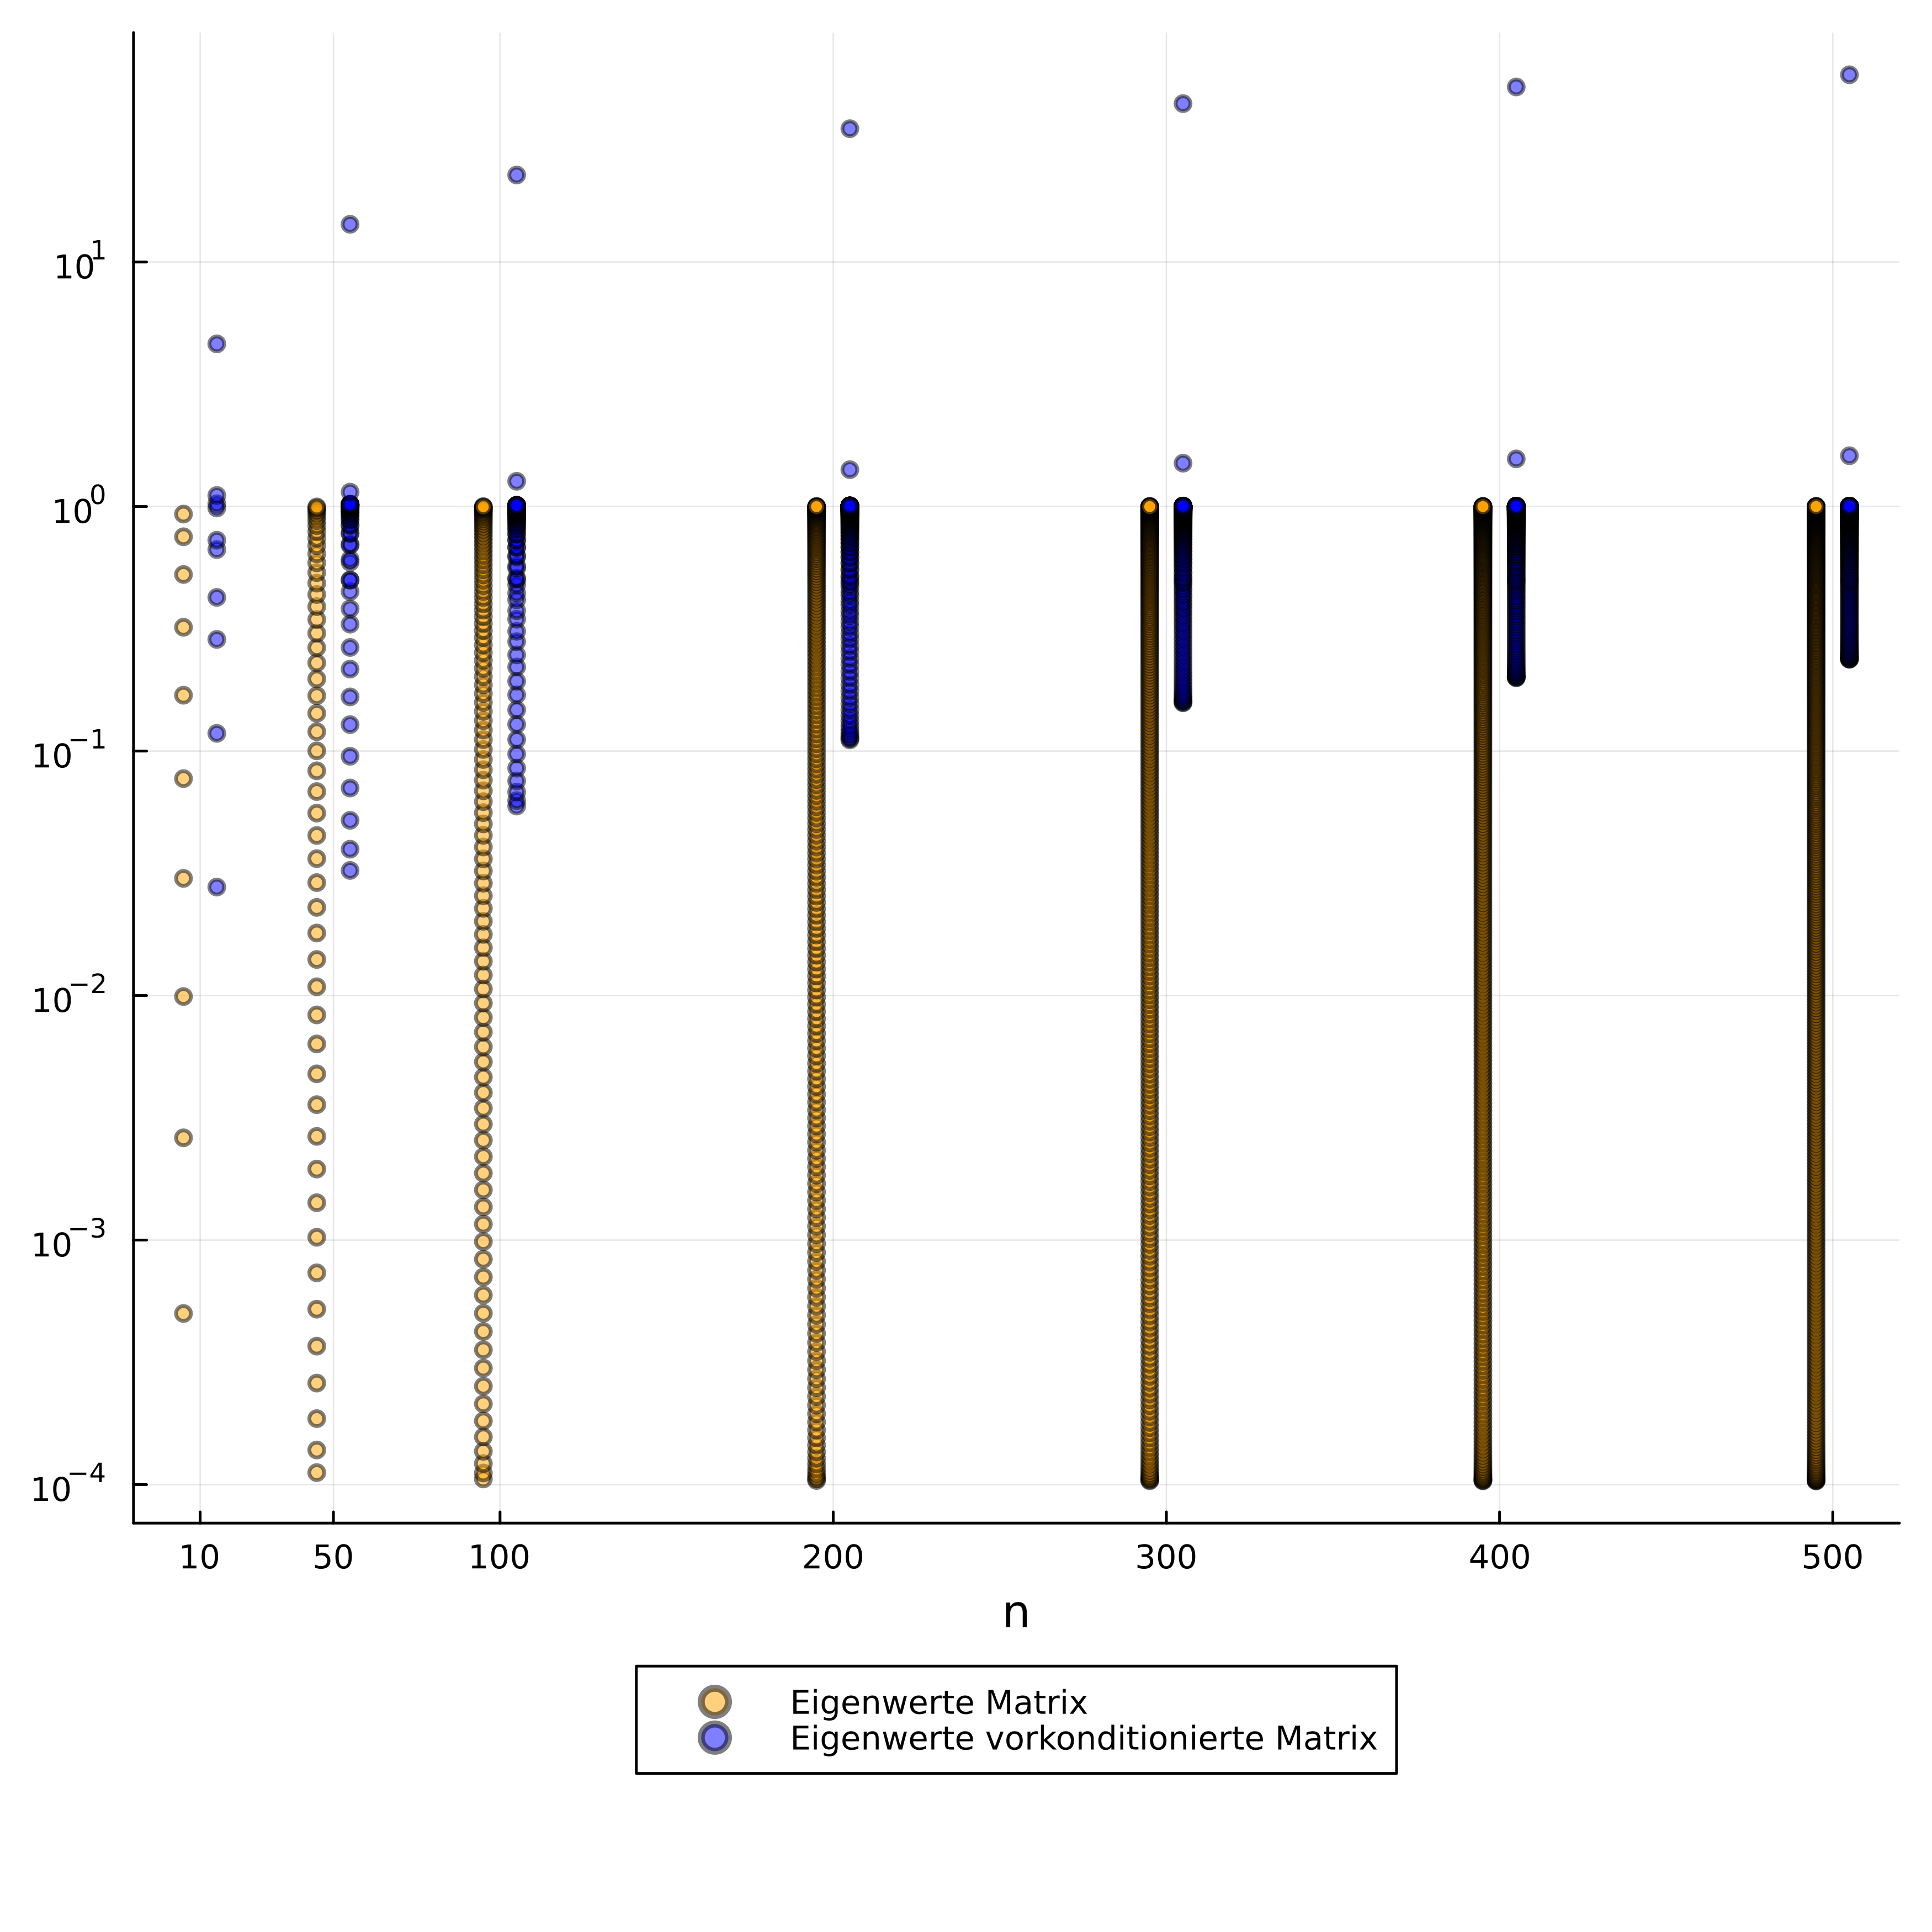

In [19]:
#Eigenwerte von Toeplitz-Matrix mit Gaußscher Glockenfunktion als erzeugende Funktion und vorkonditionierter Toeplitz-Matrix für verschiedene n
#Einträge der Toeplitz-Matrix

s= 1
e=1


#Fourier-Koeffizienten
a_phi = [e * 1/(2*sqrt(pi*s)) ]
a_psi = [e * 1/(2*sqrt(pi*s)) ]


dimensions = [10, 50, 100, 200 ,300, 400 ,500]
bsp3abb1= scatter( yscale=:log10 , ms=1, ma=1,legend=:outerbottom, xlabel = "n", size = (700,700), xticks = dimensions,dpi=500)


for i in dimensions

#Fourier-Koeffizienten
a_phi = [e * 1/(2*sqrt(pi*s)) ]
a_psi = [e * 1/(2*sqrt(pi*s)) ]
    
    
    for j in 1:i-1

        #Fourier-Koeffizienten
        push!(a_phi ,e * 1/(2*sqrt(pi*s)) *exp(-(j^2)/(4*s)))
        push!(a_psi ,e * ((i-j)/i * 1/(2*sqrt(pi*s)) *exp(-(j^2)/(4*s)) +   (j/i) *  1/(2*sqrt(pi*s)) *exp(-((i-j)^2)/(4*s))))

    end

    #Matrizen aufstellen
    T_phi = SymmetricToeplitz(a_phi)
    #T_psi ist die zyklische Matrix, die die Frobenius-Norm minimiert
    T_psi = SymmetricToeplitz(a_psi)
    T_psi_invers = trench(T_psi)

    #Eigenwerte berechnen
    eigvals_vorkond = eigvals(T_phi * T_psi_invers)
    eigvals_T = eigvals(T_phi )

    
    #damit jeweils nur ein Label erscheint
    label1 = false
    label2 = false
    if i== dimensions[1,1]
        label1 = "Eigenwerte Matrix"
        label2 = "Eigenwerte vorkonditionierte Matrix"
    end       
    vec = i * ones(i,1)
    scatter!(bsp3abb1,vec.-5,eigvals_T, ms=3, ma=0.5,seriescolor= :orange,label= label1)
    scatter!(bsp3abb1,vec.+5,eigvals_vorkond, ms=3, ma=0.5,seriescolor= :blue,label= label2)
    
end

yticks!([0,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10])
display(bsp3abb1)


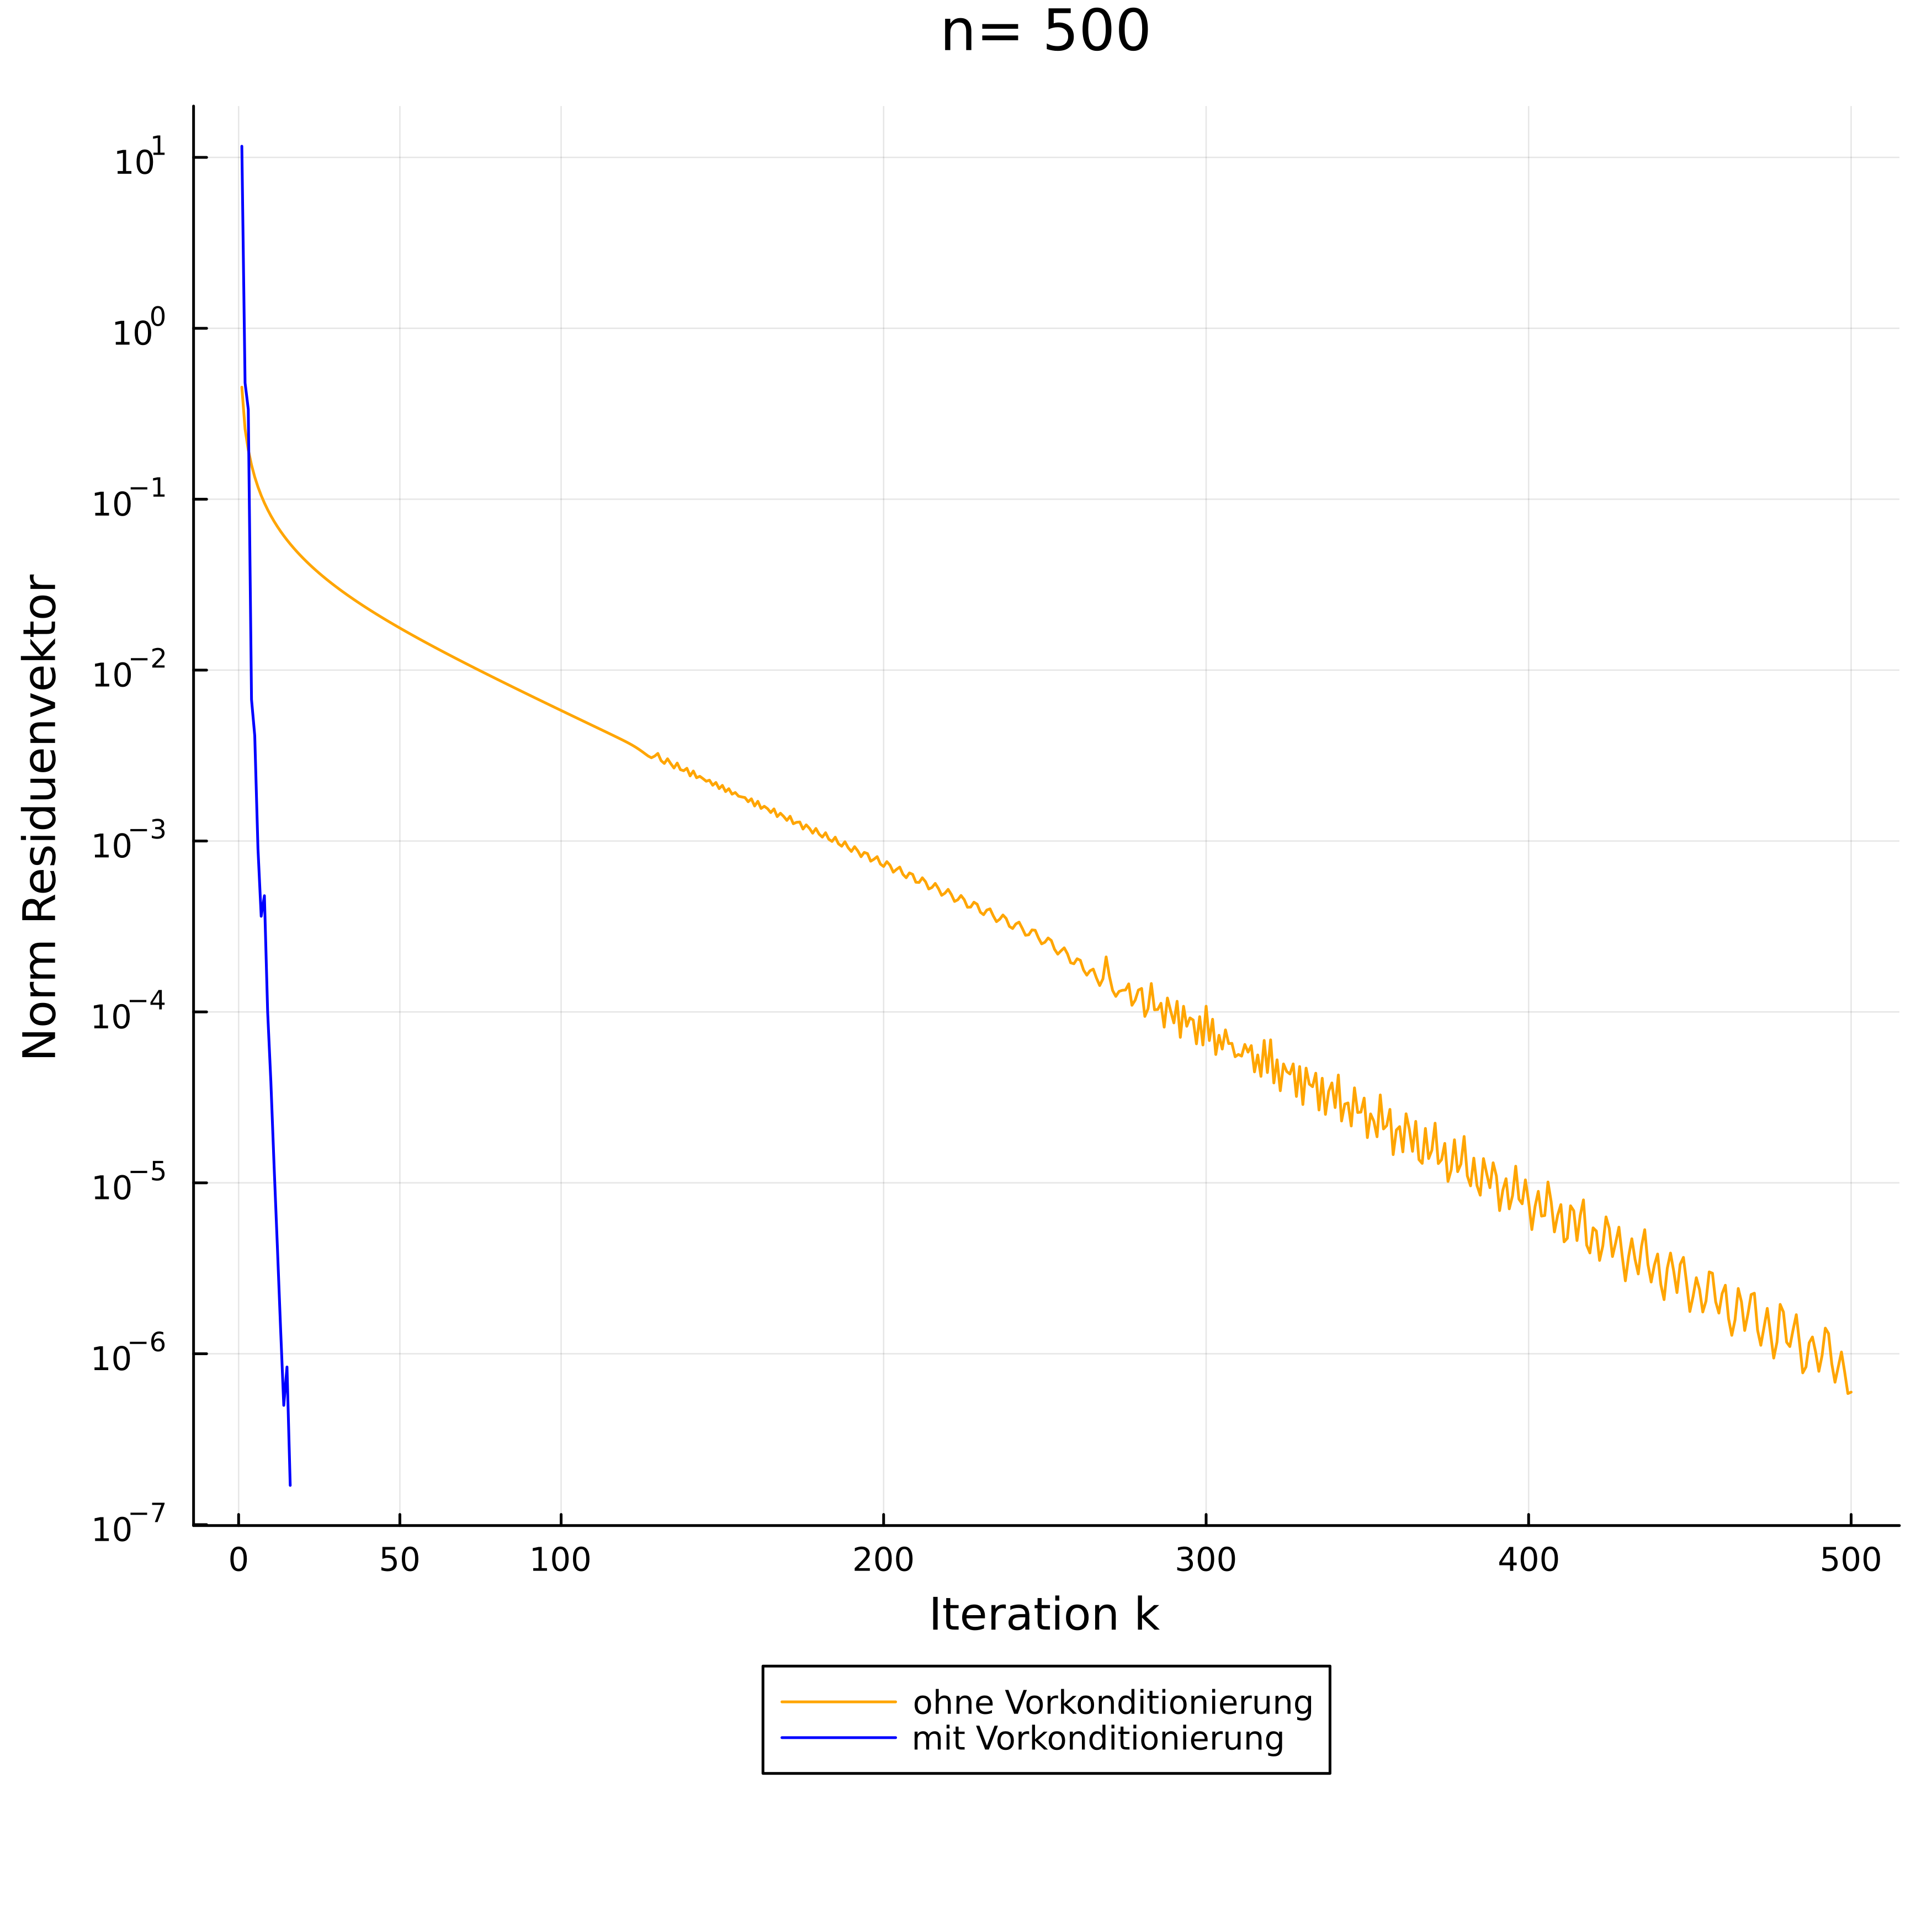

In [23]:
#Konvergenzhistorie berechnen (Norm der Residuenvektoren)


#rechte Seite des Gleichungssystems
n=500
d = ones(n)

#initiale Lösung
x = zeros(n)
x[1,1] = 1
y= zeros(n)
y[1,1] = 1


#Fourier-Koeffizienten
s= 1
e=1

a_phi = [e * 1/(2*sqrt(pi*s))]
a_psi = [e * 1/(2*sqrt(pi*s))]


for j in 1:n-1
        #erzeugenden Vektor füllen
        push!(a_phi ,e * 1/(2*sqrt(pi*s)) *exp(-(j^2)/(4*s)))
        push!(a_psi ,e * ((n-j)/n * 1/(2*sqrt(pi*s)) *exp(-(j^2)/(4*s)) +   (j/n) *  1/(2*sqrt(pi*s)) *exp(-((n-j)^2)/(4*s))))
end

#Matrizen aufstellen
T_phi = SymmetricToeplitz(a_phi)
#T_psi ist die zyklische Matrix, die die Frobenius-Norm minimiert
T_psi = SymmetricToeplitz(a_psi)


#CG-Verfahren ohne Vorkonditionierer
x, ch_1 =cg!(x, T_phi, d, log= true, abstol = 1e-7)
#mit Vorkonditionierung von links
y, ch_2 =cg!(y, T_phi, d, log= true, Pl = T_psi, abstol = 1e-7)


bsp3abb2= plot( yscale=:log10 , ms=1, ma=1,legend=:outerbottom, xlabel = "Iteration k",ylabel = "Norm Residuenvektor",title = "n= 500", size = (700,700),dpi=500)
yticks!([0,1e-7,1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100])
xticks!([0,50,100,200,300,400,500])

plot!(bsp3abb2, ch_1[:resnorm], ms=3, ma=0.5,seriescolor= :orange, label = "ohne Vorkonditionierung")
plot!(bsp3abb2,ch_2[:resnorm], ms=3, ma=0.5,seriescolor= :blue, label = "mit Vorkonditionierung")

display(bsp3abb2)


In [24]:
savefig(bsp1abb1,"bsp1abb1.png")
savefig(bsp1abb2,"bsp1abb2.png")
savefig(bsp2abb1,"bsp2abb1.png")
savefig(bsp2abb2,"bsp2abb2.png")
savefig(bsp3abb1,"bsp3abb1.png")
savefig(bsp3abb2,"bsp3abb2.png")

"/home/jovyan/Bachelorarbeit/bsp3abb2.png"

KeyError: KeyError: key "usage_request" not found

KeyError: KeyError: key "usage_request" not found